# Загрузка данных

In [1]:
import pandas as pd # для хранения данных
from matplotlib.pyplot import *
from statistics import median
import seaborn
import numpy

from sklearn.model_selection import  cross_val_score,GridSearchCV
from sklearn import linear_model


## Данные для обучения (3 и 4 курс)

In [2]:
data = pd.read_csv("16_17_cleaned.csv")
data

,progr2,progr_kr2,comp_math3,asm3,hard3,oop3,oop4,hard4,electr4,comp_math4
0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0
1,4.0,4.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,2.0
2,3.0,4.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0
3,4.0,4.0,3.0,4.0,5.0,3.0,3.0,4.0,4.0,3.0
4,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0
5,3.0,4.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,3.0
6,3.0,3.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,3.0
7,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
8,3.0,3.0,4.0,4.0,5.0,4.0,5.0,4.0,3.0,5.0
9,3.0,4.0,4.0,4.0,5.0,3.0,3.0,4.0,4.0,4.0


## независимые переменные (2 курс)

In [3]:
data2 = pd.DataFrame(pd.read_csv('18_cleaned.csv'))
data2

,discr1,math_an1,progr1,inf_kr1,alg2,progr2,math_log2,math_an2,progr_kr2,pract2,hard3,comp_math3,oop3,asm3
0,4.0,5.0,5.0,2.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,4.0,4.0,5.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,2.0,5.0,2.0,4.0
3,4.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0
4,5.0,5.0,4.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0
5,5.0,4.0,4.0,4.0,4.0,3.0,5.0,3.0,3.0,3.0,2.0,4.0,2.0,4.0
6,4.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0
7,4.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
8,4.0,5.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0
9,5.0,5.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


# Матрица Корреляции

In [4]:
# матрица корреляции 2016-2017
data.corr()

,progr2,progr_kr2,comp_math3,asm3,hard3,oop3,oop4,hard4,electr4,comp_math4
progr2,1.000000,0.787330,0.495078,0.609887,0.632312,0.725067,0.588896,0.527871,0.436674,0.461038
progr_kr2,0.787330,1.000000,0.264121,0.494831,0.525294,0.485756,0.300558,0.330107,0.185161,0.265623
comp_math3,0.495078,0.264121,1.000000,0.678730,0.535695,0.562732,0.698661,0.629708,0.465736,0.633769
asm3,0.609887,0.494831,0.678730,1.000000,0.823653,0.801498,0.682018,0.698584,0.611556,0.670378
hard3,0.632312,0.525294,0.535695,0.823653,1.000000,0.777318,0.674810,0.559594,0.426976,0.516472
oop3,0.725067,0.485756,0.562732,0.801498,0.777318,1.000000,0.767854,0.715172,0.543521,0.668328
oop4,0.588896,0.300558,0.698661,0.682018,0.674810,0.767854,1.000000,0.778026,0.597949,0.740512
hard4,0.527871,0.330107,0.629708,0.698584,0.559594,0.715172,0.778026,1.000000,0.766062,0.889933
electr4,0.436674,0.185161,0.465736,0.611556,0.426976,0.543521,0.597949,0.766062,1.000000,0.729431
comp_math4,0.461038,0.265623,0.633769,0.670378,0.516472,0.668328,0.740512,0.889933,0.729431,1.000000


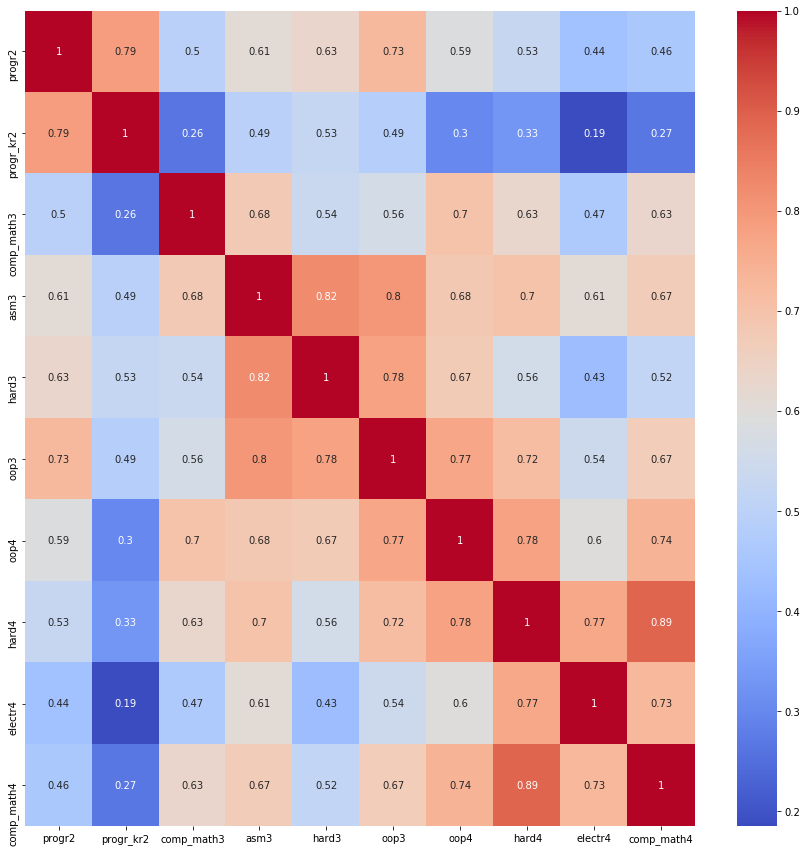

In [5]:
# матрица корреляций в seaborn 2016-2017
figure( figsize=(15,15))  # размер графика - 10х10 едениц
seaborn.heatmap( data.corr(),
                cmap='coolwarm',  # способ цветового кодирования: холодные и тёплые цвета
                annot=True)  # annot=True - показывать не только цвета, но и величну КК

# Уравнение линейной регрессии

## Вычислительная математика. 4 сем

In [6]:
# 2016-2017
# Выч.мат.4
# x = исходные переменные. [:, :-1] -- все строки, все столбцы до последнего (не включая его)
x = data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:]

# y = изучаемая переменная. [:, -1] -- все строки, последний столбец (comp_math4)
y =  data['comp_math4'].values

# создание объекта для построения линейной регрессии
reg16_17_comp = linear_model.LinearRegression()

# построение уравнения линейной регрессии.
# в объекте reg будет сохранено уравнение регрессии
reg16_17_comp.fit( x, y )

# уравнение множественной регресии
# оценка ошибок (MAE или MAPE)

# коэффициенты уравнения регресии 2016-2017
#reg16_17.coef_
#reg = linear_model.LinearRegression()
# Квадрат средней ошибки
cross_val_score(reg16_17_comp, data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:], data['comp_math4'].values, cv = 5, scoring = "neg_mean_squared_error").mean()

-3.258257585322641

In [7]:
# свободный член уравнения регресии 2016-2017
#reg16_17.intercept_
# предсказание оценок для одного студента
#reg16_17.predict([[5, 5,  5,5,   5,5,  5,5,   5]] )
reg16_17_comp.fit( data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:], data['comp_math4'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Коэффициенты уравнения регрессии
reg16_17_comp.coef_

array([-0.05089738, -0.05051579,  0.36923982,  0.39921593, -0.26126368,
        0.4991934 ])

#### Вычмат. 4 сем. Коэф. уравнения регресии

In [9]:
# Коэффициенты уравнения регрессии: свободный член
reg16_17_comp.intercept_

0.5511730298484863

In [10]:
# предсказание 2016-2017 вычмат4
reg16_17_comp.predict(  data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:] )

array([2.09985393, 3.67051228, 2.34714091, 3.0413653 , 3.00482622,
       3.21557412, 2.62894426, 2.62894426, 4.01121169, 3.4615025 ,
       3.63532973, 3.77328197, 4.12016482, 3.77328197, 3.18703371,
       3.93956923, 4.70679468, 5.12655028, 4.82836592, 5.07603449,
       5.07603449, 5.12655028, 4.35288809, 4.67825426, 5.07603449,
       3.27921584, 4.28047403, 4.67681857, 5.17744766])

### ООП. 4 сем.

In [11]:
# ИСПРАВЛЕНО
# 2016-2017
# ООП4
# x = исходные переменные. [:, :-1] -- все строки, все столбцы до последнего (не включая его)
# data.drop('oop4',axis = 1)  # при таком удалении текущий объект не меняется, а возвращается новый
# 
x = data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:]

# y = изучаемая переменная. [:, -1] -- все строки, последний столбец
# data.drop(['progr2','progr_kr2','comp_math3','asm3','hard3','oop3','hard4','electr4','comp_math4'],axis = 1)
# y = data.values[:,:]
y = data['oop4'].values

# создание объекта для построения линейной регрессии
reg16_17_oop = linear_model.LinearRegression()

# построение уравнения линейной регрессии.
# в объекте reg будет сохранено уравнение регрессии
reg16_17_oop.fit( x, y )

# уравнение множественной регресии
# оценка ошибок (MAE или MAPE)

# коэффициенты уравнения регресии 2016-2017
# reg16_17.coef_
#reg = linear_model.LinearRegression()
# Квадрат средней ошибки
cross_val_score(reg16_17_oop, data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:], data['oop4'].values, cv = 5, scoring = "neg_mean_squared_error").mean()

-1.1726792409064692

In [12]:
reg16_17_oop.fit( data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:], data['oop4'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
# oop 4
reg16_17_oop.predict(  data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:] )

array([1.59586226, 3.25508674, 1.1218561 , 2.67762396, 2.63962644,
       2.12762277, 1.73787442, 1.73787442, 3.74957146, 2.97965517,
       2.84781943, 2.95199778, 3.58955241, 2.95199778, 2.14408397,
       3.04636193, 3.97930076, 4.69949742, 5.34949589, 4.45732428,
       4.45732428, 4.69949742, 3.33618308, 3.99576196, 4.45732428,
       3.73314235, 3.53419965, 4.62297647, 4.52350511])

#### ООП. 4 сем. Коэф. уравнения регресии

In [14]:
# коэффициенты. ООП4
reg16_17_oop.coef_

array([ 0.17599231, -0.24217314,  0.47802352, -0.16565218,  0.26983053,
        0.52774315])

In [15]:
# коэффициенты. свободный член ООП4
reg16_17_oop.intercept_

-0.7614966403999248

## ЭВМ. 4 семестр

In [16]:
# ИСПРАВЛЕНО
# 2016-2017
# ЭВМ4
# x = исходные переменные. [:, :-1] -- все строки, все столбцы до последнего (не включая его)
# data.drop('oop4',axis = 1)  # при таком удалении текущий объект не меняется, а возвращается новый
# 
x =  data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:]

# y = изучаемая переменная. [:, -1] -- все строки, последний столбец
# data.drop(['progr2','progr_kr2','comp_math3','asm3','hard3','oop3','hard4','electr4','comp_math4'],axis = 1)
# y = data.values[:,:]
y = data['hard4'].values

# создание объекта для построения линейной регрессии
reg16_17_hard = linear_model.LinearRegression()

# построение уравнения линейной регрессии.
# в объекте reg будет сохранено уравнение регрессии
reg16_17_hard.fit( x, y )

# уравнение множественной регресии
# оценка ошибок (MAE или MAPE)

# коэффициенты уравнения регресии 2016-2017
# reg16_17.coef_
#reg = linear_model.LinearRegression()
# Квадрат средней ошибки
cross_val_score(reg16_17_hard,  data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:], 
                data['hard4'].values, cv = 5, scoring = "neg_mean_squared_error").mean()

-1.9129980745190092

In [17]:
reg16_17_hard.fit( data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:], data['hard4'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# hard4
reg16_17_hard.predict(  data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:])

array([1.99736951, 3.66218567, 2.2995612 , 2.98645477, 2.8757995 ,
       3.06733592, 2.48316744, 2.48316744, 3.77456566, 3.26540563,
       3.3819336 , 3.51292504, 3.98141273, 3.51292504, 2.89310974,
       3.44294211, 4.56558122, 4.88017889, 4.58564251, 4.8521874 ,
       4.8521874 , 4.88017889, 4.02671446, 4.39135503, 4.8521874 ,
       3.1888116 , 3.93052266, 4.50166804, 4.87252357])

### ЭВМ. 4 сем. Коэф. уравнения регресии

In [19]:
reg16_17_hard.coef_

array([ 0.00765532, -0.02799149,  0.28660618,  0.35051936, -0.21952792,
        0.48116854])

In [20]:
reg16_17_hard.intercept_

0.4600374481864189

## Таблицы с предсказаниями для проверки по 3 и 4 курсу

In [21]:
data_regr = data[['oop4','hard4','comp_math4']]
data_regr

,oop4,hard4,comp_math4
0,2.0,2.0,2.0
1,2.0,2.0,2.0
2,2.0,2.0,2.0
3,3.0,4.0,3.0
4,3.0,3.0,4.0
5,0.0,3.0,3.0
6,2.0,3.0,3.0
7,2.0,2.0,2.0
8,5.0,4.0,5.0
9,3.0,4.0,4.0


In [22]:
#data1['electr4'] = reg16_17_comp.predict( data.values[:,1:-1] ) #предсказание вычмата4
#data1['oop3'] = reg16_17_oop.predict( data.drop('oop4',axis = 1).values[:,:] )#предсказание ооп4
#data1['hard3'] =  reg16_17_oop.predict( data.drop('hard4',axis = 1).values[:,:]) #предсказание ЭВМ4


data_regr['pred_comp_math4'] = reg16_17_comp.predict( data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:] ) 
data_regr['pred_oop4'] =       reg16_17_oop.predict(  data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:] )
data_regr['pred_hard4'] =      reg16_17_oop.predict(  data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:])
data_regr

/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,oop4,hard4,comp_math4,pred_comp_math4,pred_oop4,pred_hard4
0,2.0,2.0,2.0,2.099854,1.595862,1.595862
1,2.0,2.0,2.0,3.670512,3.255087,3.255087
2,2.0,2.0,2.0,2.347141,1.121856,1.121856
3,3.0,4.0,3.0,3.041365,2.677624,2.677624
4,3.0,3.0,4.0,3.004826,2.639626,2.639626
5,0.0,3.0,3.0,3.215574,2.127623,2.127623
6,2.0,3.0,3.0,2.628944,1.737874,1.737874
7,2.0,2.0,2.0,2.628944,1.737874,1.737874
8,5.0,4.0,5.0,4.011212,3.749571,3.749571
9,3.0,4.0,4.0,3.461503,2.979655,2.979655


# Случайный лес

### Подбор гиперпараметров

In [23]:
# ИСПРАВЛЕНО

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# значения парметров ещё можно уточнить произведя более детальный поиск
# Выч.мат.
params_comp = [{"n_estimators": [100, 150, 200, 230, 270],   # число деревьев
           "min_samples_leaf":[1,2,3],  
           "min_samples_split": [3,2], # число объектов на лист
           "max_depth": [3,4,6,8],                   # макс. глубина (не больше чем число иксов)
           "max_features": [3, 4,6,8]                 # число признаков (иксов) из которых выбирается лучший признак для построения узла
          }]

random_forest_comp = RandomForestRegressor(max_depth=2, random_state=0)

grid_search_forest_comp = GridSearchCV(random_forest_comp,params_comp,cv=5,scoring = 'neg_mean_squared_error',
                                  refit=True,n_jobs=-1, verbose=1)
# grid_search_forest_comp.fit(data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:], data['comp_math4'].values)


#random_forest.fit(data1.values[:,1:-1], data1.values[:,-1])
# grid_search_forest_comp.best_params_

best_params_comp = {'max_depth': 8, 'max_features': 2, 'min_samples_leaf': 1,"min_samples_split": 2,  'n_estimators': 150}

In [24]:
#oop
params_oop = [{"n_estimators": [150, 200, 230, 270],   # число деревьев
           "min_samples_leaf":[1,2,3], 
           "min_samples_split": [3,2],               # число объектов на лист
           "max_depth": [4,6,8],                   # макс. глубина (не больше чем число иксов)
           "max_features": [4,6,8]                 # число признаков (иксов) из которых выбирается лучший признак для построения узла
          }]

random_forest_oop = RandomForestRegressor(max_depth=2, random_state=0)

grid_search_forest_oop = GridSearchCV(random_forest_oop,params_oop,cv=5,scoring = 'neg_mean_squared_error',
                                  refit=True,n_jobs=-1, verbose=1)
# grid_search_forest_oop.fit(data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:], data['oop4'].values)


#random_forest.fit(data1.values[:,1:-1], data1.values[:,-1])
# grid_search_forest_oop.best_params_

best_params_oop = {'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 2,  'min_samples_split': 2,  'n_estimators': 175}

In [25]:
#ЭВМ
params_hard = [{"n_estimators": [150, 200, 230, 270],   # число деревьев
           "min_samples_leaf":[1,2,3],  
           "min_samples_split": [3,2],# число объектов на лист
           "max_depth": [4,6,8],                   # макс. глубина (не больше чем число иксов)
           "max_features": [4,6,8]                 # число признаков (иксов) из которых выбирается лучший признак для построения узла
          }]

random_forest_hard = RandomForestRegressor(max_depth=2, random_state=0)

grid_search_forest_hard = GridSearchCV(random_forest_hard,params_hard,cv=5,scoring = 'neg_mean_squared_error',
                                  refit=True,n_jobs=-1, verbose=1)
# grid_search_forest_hard.fit(data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:], data['hard4'].values)


#random_forest.fit(data1.values[:,1:-1], data1.values[:,-1])
# grid_search_forest_hard.best_params_

best_params_hard = {'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split':3,'n_estimators': 50}

### Задание найденных гиперпараметров. Измерение качества

In [26]:
# Выч.мат.

# если был запущен поиск параметров, то взять их их объекта поиска
# иначе, если параметры уже сохранены в переменную, то использовать её
if hasattr(grid_search_forest_comp,'best_params_'):
    best_params_comp = grid_search_forest_comp.best_params_

random_forest_comp.n_estimators =     best_params_comp['n_estimators']
random_forest_comp.min_samples_leaf = best_params_comp['min_samples_leaf']
random_forest_comp.min_samples_split = best_params_comp['min_samples_split'] 
random_forest_comp.max_depth =        best_params_comp['max_depth']
random_forest_comp.max_features =     best_params_comp['max_features']


cross_val_score(random_forest_comp, data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:], data['comp_math4'].values, cv = 5, 
                scoring = "neg_mean_squared_error").mean()

-1.0028354703703704

In [27]:
# ООП
if hasattr(grid_search_forest_oop,'best_params_'):
    best_params_oop = grid_search_forest_oop.best_params_
    
random_forest_oop.n_estimators =     best_params_oop['n_estimators']
random_forest_oop.min_samples_leaf = best_params_oop['min_samples_leaf']
random_forest_oop.max_depth =        best_params_oop['max_depth']
random_forest_oop.max_features =     best_params_oop['max_features']

cross_val_score(random_forest_oop, data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:], data['oop4'].values, cv = 5, 
                scoring = "neg_mean_squared_error").mean()

-0.8027539251561006

In [28]:
#ЭВМ
if hasattr(grid_search_forest_hard,'best_params_'):
    best_params_hard = grid_search_forest_hard.best_params_
    
random_forest_hard.n_estimators =     best_params_hard['n_estimators']
random_forest_hard.min_samples_leaf = best_params_hard['min_samples_leaf']
random_forest_hard.max_depth =        best_params_hard['max_depth']
random_forest_hard.max_features =     best_params_hard['max_features']

cross_val_score(random_forest_hard, data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:], data['hard4'].values, cv = 5, 
                scoring = "neg_mean_squared_error").mean()

-0.7660293467876038

### Таблицы с предсказаниями для проверки по 3 и 4 курсу

In [29]:
random_forest_comp.fit(x,y)
random_forest_oop.fit(x,y)
random_forest_hard.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [30]:
random_forest_comp.predict( data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:])

array([2.19722222, 2.98333333, 2.23966667, 3.61666667, 3.13      ,
       2.93      , 2.51588889, 2.51588889, 4.00333333, 3.98333333,
       3.66580952, 4.42139683, 4.07144444, 4.42139683, 3.02944444,
       3.21644444, 4.94666667, 4.96      , 4.88      , 5.        ,
       5.        , 4.96      , 3.29525397, 3.35555556, 5.        ,
       2.62666667, 3.24555556, 4.93333333, 4.66666667])

In [31]:
data_rand = data[['oop4','hard4','comp_math4']]


data_rand['pred_oop4'] = random_forest_oop.predict(  data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:])
data_rand['pred_hard4'] = random_forest_hard.predict(  data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:])
data_rand['pred_comp4'] = random_forest_comp.predict( data.drop(['comp_math4','oop4','hard4','electr4'],axis = 1).values[:,:])
data_rand

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,oop4,hard4,comp_math4,pred_oop4,pred_hard4,pred_comp4
0,2.0,2.0,2.0,2.357311,2.146667,2.197222
1,2.0,2.0,2.0,3.469250,2.960000,2.983333
2,2.0,2.0,2.0,2.385508,2.241667,2.239667
3,3.0,4.0,3.0,3.450987,3.730000,3.616667
4,3.0,3.0,4.0,3.154151,3.128333,3.130000
5,0.0,3.0,3.0,2.853487,3.061667,2.930000
6,2.0,3.0,3.0,2.531259,2.560667,2.515889
7,2.0,2.0,2.0,2.531259,2.560667,2.515889
8,5.0,4.0,5.0,3.943827,4.120667,4.003333
9,3.0,4.0,4.0,3.888357,4.097333,3.983333


# Предсказание для 2-го курса

## Линейная регрессия

In [32]:
data2 = data2[['progr2','progr_kr2','comp_math3','asm3','hard3','oop3']]

In [33]:
reg16_17_oop.predict( data2.values[:,:] )

array([4.45732428, 4.45732428, 2.12044395, 4.52350511, 4.28133197,
       1.88459357, 3.92958113, 4.45732428, 4.52350511, 4.45732428,
       3.16980917, 3.92958113, 2.18208149, 4.45732428, 3.75358882,
       1.12748924, 4.45732428, 4.45732428, 2.95199778, 3.75358882,
       4.06194279, 4.45732428, 4.06194279, 3.92958113, 1.2598509 ,
       0.95149693, 3.23756779, 3.22584567])

In [34]:
reg16_17_comp.predict( data2.values[:,:] )

array([5.07603449, 5.07603449, 4.11533997, 5.17744766, 5.12693188,
       3.79661594, 4.57684109, 5.07603449, 5.17744766, 5.07603449,
       5.49058573, 4.57684109, 3.22357278, 5.07603449, 4.62773848,
       2.05687811, 5.07603449, 5.07603449, 3.77328197, 4.62773848,
       4.77966743, 5.07603449, 4.77966743, 4.57684109, 2.25970445,
       2.10777549, 4.22195958, 4.12854508])

In [35]:
reg16_17_hard.predict( data2.values[:,:] )

array([4.8521874 , 4.8521874 , 3.72942703, 4.87252357, 4.84453208,
       3.47081234, 4.37101886, 4.8521874 , 4.87252357, 4.8521874 ,
       5.22416497, 4.37101886, 3.00376501, 4.8521874 , 4.36336354,
       2.15588891, 4.8521874 , 4.8521874 , 3.51292504, 4.36336354,
       4.4116912 , 4.8521874 , 4.4116912 , 4.37101886, 2.19656126,
       2.14823359, 3.96610209, 3.882195  ])

In [36]:
data_regr2 = data2[['oop3','hard3','comp_math3']]
data_regr2['pred_comp_math4'] = reg16_17_comp.predict( data2.values[:,:] ) 
data_regr2['pred_oop4'] = reg16_17_oop.predict( data2.values[:,:] ) 
data_regr2['pred_hard4'] = reg16_17_hard.predict( data2.values[:,:] ) 
data_regr2

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,oop3,hard3,comp_math3,pred_comp_math4,pred_oop4,pred_hard4
0,5.0,5.0,5.0,5.076034,4.457324,4.852187
1,5.0,5.0,5.0,5.076034,4.457324,4.852187
2,2.0,2.0,5.0,4.115340,2.120444,3.729427
3,5.0,5.0,5.0,5.177448,4.523505,4.872524
4,5.0,5.0,5.0,5.126932,4.281332,4.844532
5,2.0,2.0,4.0,3.796616,1.884594,3.470812
6,4.0,5.0,5.0,4.576841,3.929581,4.371019
7,5.0,5.0,5.0,5.076034,4.457324,4.852187
8,5.0,5.0,5.0,5.177448,4.523505,4.872524
9,5.0,5.0,5.0,5.076034,4.457324,4.852187


## Случайный лес

In [37]:
data_rand2 = data2.copy()

data_rand2['pred_oop4'] = random_forest_oop.predict(  data2.values )
data_rand2['pred_hard4'] = random_forest_hard.predict(  data2.values )
data_rand2['pred_comp_math4'] = random_forest_comp.predict(  data2.values )
data_rand2

,progr2,progr_kr2,comp_math3,asm3,hard3,oop3,pred_oop4,pred_hard4,pred_comp_math4
0,5.0,5.0,5.0,5.0,5.0,5.0,4.887668,5.000000,5.000000
1,5.0,5.0,5.0,5.0,5.0,5.0,4.887668,5.000000,5.000000
2,3.0,4.0,5.0,4.0,2.0,2.0,3.275439,3.197667,3.219556
3,4.0,4.0,5.0,5.0,5.0,5.0,4.379619,4.660000,4.666667
4,4.0,5.0,5.0,5.0,5.0,5.0,4.474127,4.660000,4.760000
5,3.0,3.0,4.0,4.0,2.0,2.0,3.408229,4.096333,3.529000
6,5.0,5.0,5.0,5.0,5.0,4.0,4.235583,3.320000,4.006667
7,5.0,5.0,5.0,5.0,5.0,5.0,4.887668,5.000000,5.000000
8,4.0,4.0,5.0,5.0,5.0,5.0,4.379619,4.660000,4.666667
9,5.0,5.0,5.0,5.0,5.0,5.0,4.887668,5.000000,5.000000
